# SUPPORT VECTOR MACHINE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# EDA

Columns after cleanup: ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat', 'class', 'stalk_height', 'cap_diameter']
Dataset Shape: (2000, 25)

Column Names: ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat', 'class', 'stalk_height', 'cap_diameter']

First 5 Rows:
  cap_shape cap_surface cap_color bruises   odor gill_attachment gill_spacing  \
0    sunken       scaly     white   

/tmp/ipython-input-3535592631.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=data, palette='Set2')


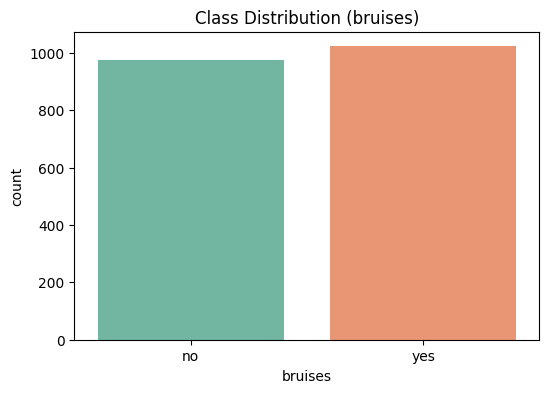

/tmp/ipython-input-3535592631.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=ax, palette='Set3')
/tmp/ipython-input-3535592631.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=ax, palette='Set3')
/tmp/ipython-input-3535592631.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=ax, palette='Set3')
/tmp/ipython-input-3535592631.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

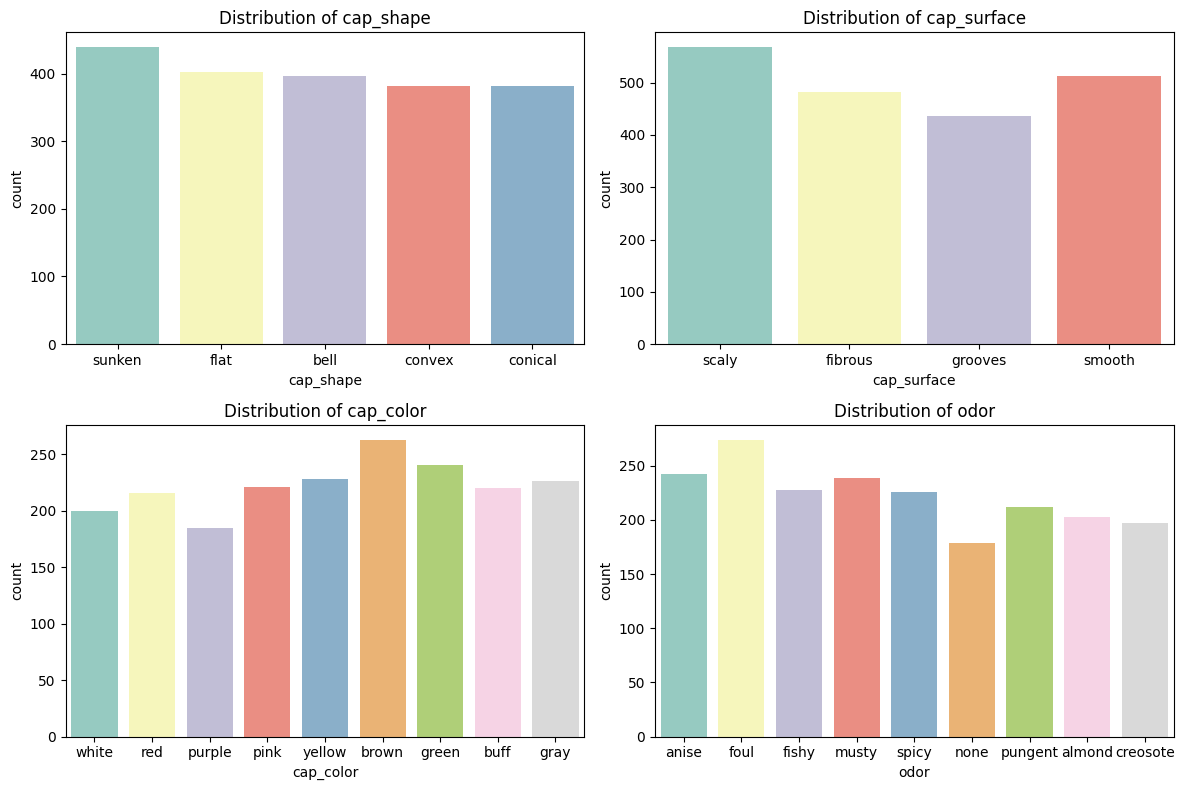

In [ ]:
# Load dataset
data = pd.read_csv("mushroom.csv")

# Drop any unnamed index column if it exists
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

print("Columns after cleanup:", list(data.columns))


print("Dataset Shape:", data.shape)
print("\nColumn Names:", list(data.columns))
print("\nFirst 5 Rows:")
print(data.head())

# Check for missing values
print("\nMissing Values per Column:\n", data.isnull().sum())


# Identify target column automatically (2 unique values)
target_candidates = [col for col in data.columns if data[col].nunique() == 2]
if target_candidates:
    target_col = target_candidates[0]
else:
    target_col = data.columns[0]  # fallback to first column

print(f"\nDetected Target Column: {target_col}")


# Basic Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=data, palette='Set2')
plt.title(f"Class Distribution ({target_col})")
plt.show()

# Visualize first few categorical features
feature_cols = [col for col in data.columns if col != target_col][:4]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, col in zip(axes.flatten(), feature_cols):
    sns.countplot(x=col, data=data, ax=ax, palette='Set3')
    ax.set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


# Data Preprocessing

In [ ]:
# Encode all categorical features
encoder = LabelEncoder()
for col in data.columns:
    data[col] = encoder.fit_transform(data[col])

# Separate features and target
X = data.drop(target_col, axis=1)
y = data[target_col]

# Fix issue: ensure both classes have enough samples for stratify
unique_counts = y.value_counts()
if unique_counts.min() < 2:
    print("\n⚠️ Warning: Target class imbalance detected. Removing rare class...")
    rare_class = unique_counts.idxmin()
    mask = y != rare_class
    X, y = X[mask], y[mask]

# Train-test split (stratify only if possible)
try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
except ValueError:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

# Standardize features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData Preprocessing Completed Successfully.")


Data Preprocessing Completed Successfully.


# DATA VISUALIZATION

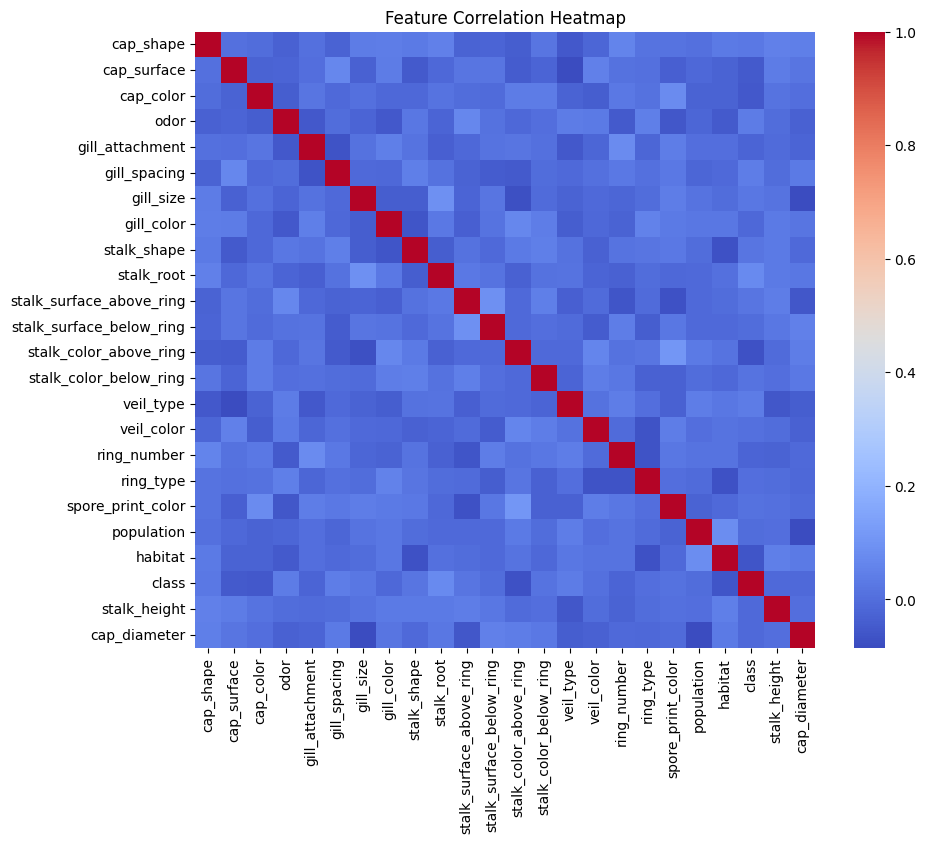

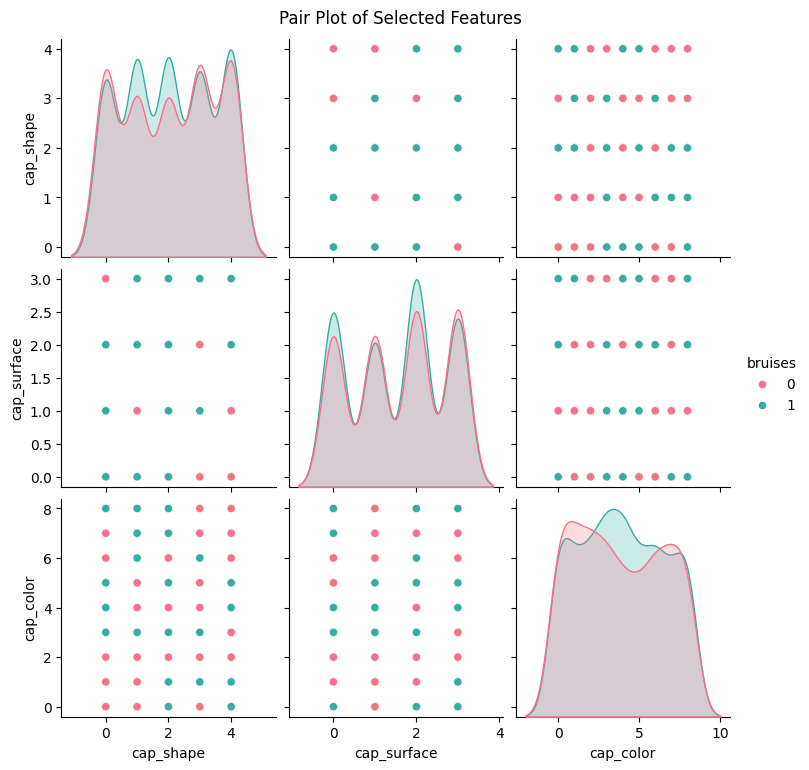

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(X_train_scaled, columns=X.columns).corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Pair plot (select a few features)
sample_features = [target_col] + list(X.columns[:3])
sns.pairplot(data[[*sample_features]], hue=target_col, palette='husl')
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

# SVM IMPLEMENTATION


--- SVM (Linear Kernel) Performance ---
Accuracy: 0.5225

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.46      0.49       195
           1       0.53      0.58      0.55       205

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.52      0.52      0.52       400



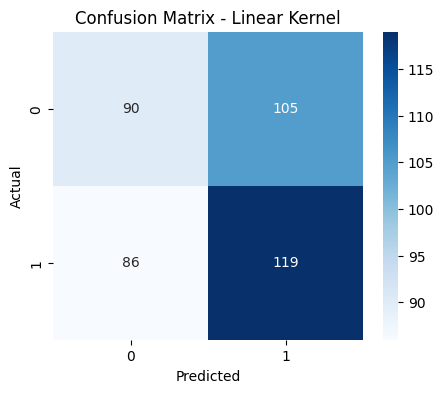

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)

print("\n--- SVM (Linear Kernel) Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix - Linear Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# VISUALIZATION OF SVM RESULTS

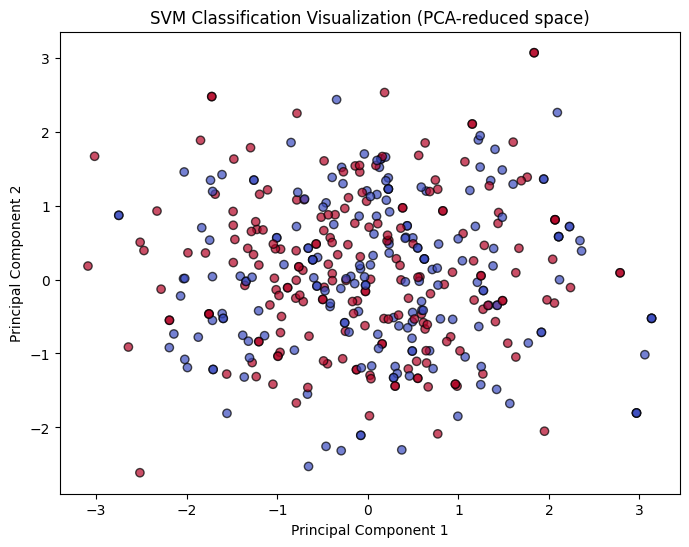

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm_vis = SVC(kernel='rbf', gamma='auto')
svm_vis.fit(X_train_pca, y_train)

plt.figure(figsize=(8,6))
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.title("SVM Classification Visualization (PCA-reduced space)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


# PARAMETER TUNING AND OPTIMIZATION

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)

print("\n--- Tuned SVM Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))



Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy: 0.8193721263055327

--- Tuned SVM Performance ---
Accuracy: 0.8425

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       195
           1       0.85      0.84      0.85       205

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



# COMPARISON AND ANALYSIS


--- Kernel Comparison ---
Linear Kernel Accuracy: 0.5225
Poly Kernel Accuracy: 0.8400
Rbf Kernel Accuracy: 0.8025


/tmp/ipython-input-2075136392.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='Set2')


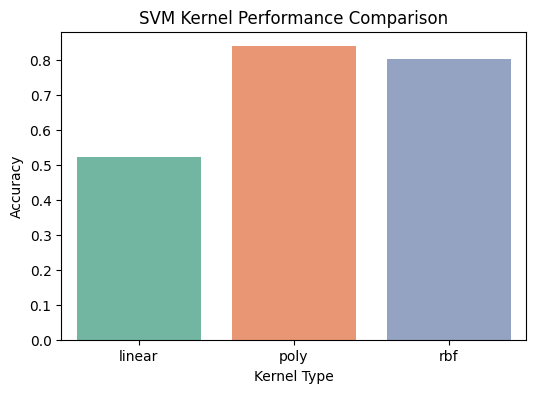

In [ ]:
kernels = ['linear', 'poly', 'rbf']
results = {}
for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[k] = accuracy_score(y_test, y_pred)

print("\n--- Kernel Comparison ---")
for k, acc in results.items():
    print(f"{k.capitalize()} Kernel Accuracy: {acc:.4f}")

plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='Set2')
plt.title("SVM Kernel Performance Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Kernel Type")
plt.show()